<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales2026/blob/main/Semana2/Graficacion3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [35]:
# Necesitamos definir el conjunto de soporte del campo
# Un lattice
N = 5
x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)

In [36]:
x

array([-5. , -2.5,  0. ,  2.5,  5. ])

In [37]:
y

array([-5. , -2.5,  0. ,  2.5,  5. ])

In [38]:
# Dominio del soporte
X,Y = np.meshgrid(x,y)

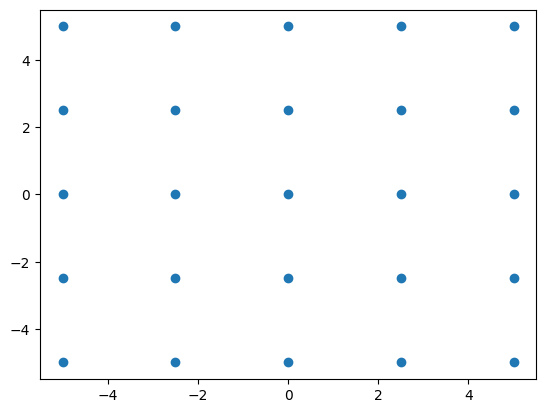

In [39]:
plt.scatter(X,Y)

In [40]:
def f2(x,y):
  return np.sin(x) + 5*np.cos(y)

In [41]:
# Definimos la imagen
Z = np.zeros_like(X)
Z

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [42]:
for i in range(N):
  for j in range(N):
    Z[i,j] = f2(x[i],y[j])

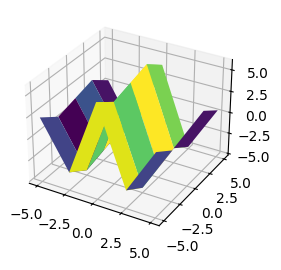

In [43]:
from matplotlib import cm
fig1 = plt.figure(figsize=(3,3))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X,Y,Z,cmap='viridis')

In [44]:
# Para un campo vectorial necesitamos 2 componentes
Ex = np.zeros((N,N))
Ey = np.zeros((N,N))

In [45]:
Ex

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [72]:
#definir que es el campo
def GetField(x,y,r0):

  x0 = r0[0]
  y0 = r0[1]

  #print(x0,y0)
  # Ley de Coulomb
  Ex = ( x-x0 )/(  (x-x0)**2 + (y-y0)**2  )**(3/2)
  Ey = ( y-y0 )/(  (x-x0)**2 + (y-y0)**2  )**(3/2)

  return Ex,Ey

In [78]:
fuentes = np.zeros((4,2))
fuentes

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [80]:
fuentes[0] = [0,2]
fuentes[1] = [-1,-4]
fuentes[2] = [-4,4]
fuentes[3] = [2,-2]

In [81]:
fuentes

array([[ 0.,  2.],
       [-1., -4.],
       [-4.,  4.],
       [ 2., -2.]])

In [74]:
GetField(1,3,fuentes)

(-0.25, -0.0)

In [75]:
# Llenamos el valor del campo
for i in range(N):
  for j in range(N):
    Ex[i,j] = GetField(x[i],y[j],fuentes)[0]
    Ey[i,j] = GetField(x[i],y[j],fuentes)[1]

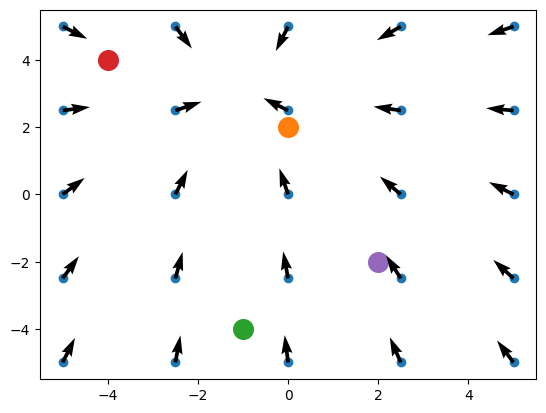

In [86]:
plt.scatter(X,Y)
#plt.scatter(*fuentes, color='r',s=200)

for q in range(fuentes.shape[0]):
  plt.scatter(*fuentes[q],s=200)

for i in range(N):
  for j in range(N):
    plt.quiver(x[i],y[j],Ex[i,j],Ey[i,j])